In [1]:
# %run ../../base-notebook.ipynb

rm: contents.txt: No such file or directory
--2023-05-16 11:46:45--  https://raw.githubusercontent.com/sodeso-nl/ml-utilities/main/contents.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444 [text/plain]
Saving to: ‘contents.txt’

contents.txt        100%[===================>]     444  --.-KB/s    in 0s      

2023-05-16 11:46:45 (42.3 MB/s) - ‘contents.txt’ saved [444/444]

--2023-05-16 11:46:45--  https://raw.githubusercontent.com/sodeso-nl/ml-utilities/main/ml_callback.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaitin

In [1]:
import sys

sys.path.append("../../ext")

import sn

import tensorflow as tf
import keras_tuner as kt

from keras import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.utils import to_categorical

SyntaxError: invalid syntax (530328895.py, line 5)

## Define class labels

In [3]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

## Download the MNIST data set

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train size: {len(X_train)}, shape {X_train.shape}")
print(f"y_train size: {len(y_train)}, shape {y_train.shape}")
print(f"X_test size: {len(X_test)}, shape {X_test.shape}")
print(f"y_test size: {len(y_test)}, shape {y_test.shape}")

X_train size: 60000, shape (60000, 28, 28)
y_train size: 60000, shape (60000,)
X_test size: 10000, shape (10000, 28, 28)
y_test size: 10000, shape (10000,)


## Pre-process data

In [5]:
X_train = X_train / 255.
X_test = X_test / 255.

## Reshape the data

In [6]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

## Visualize the data

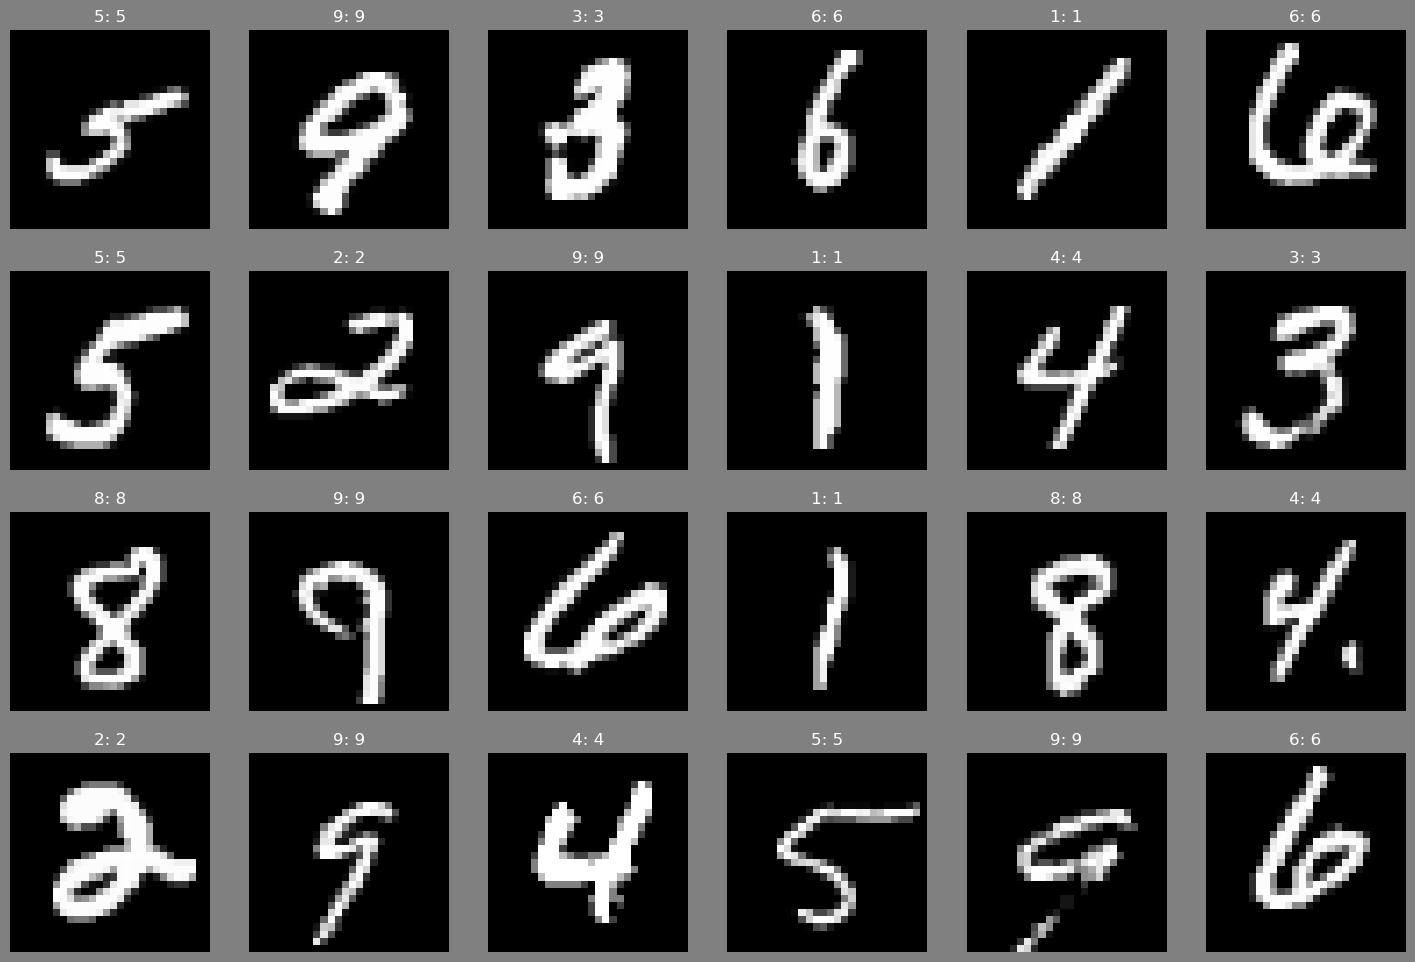

In [15]:
mlp.show_images_from_nparray_or_tensor(x=X_train, y=y_train, class_names=class_names, shape=(4, 6))

## One-hot encode the labels

In [7]:
y_train = to_categorical(y_train, dtype=int)
y_test = to_categorical(y_test, dtype=int)

## Inspect if the labels still match with the images

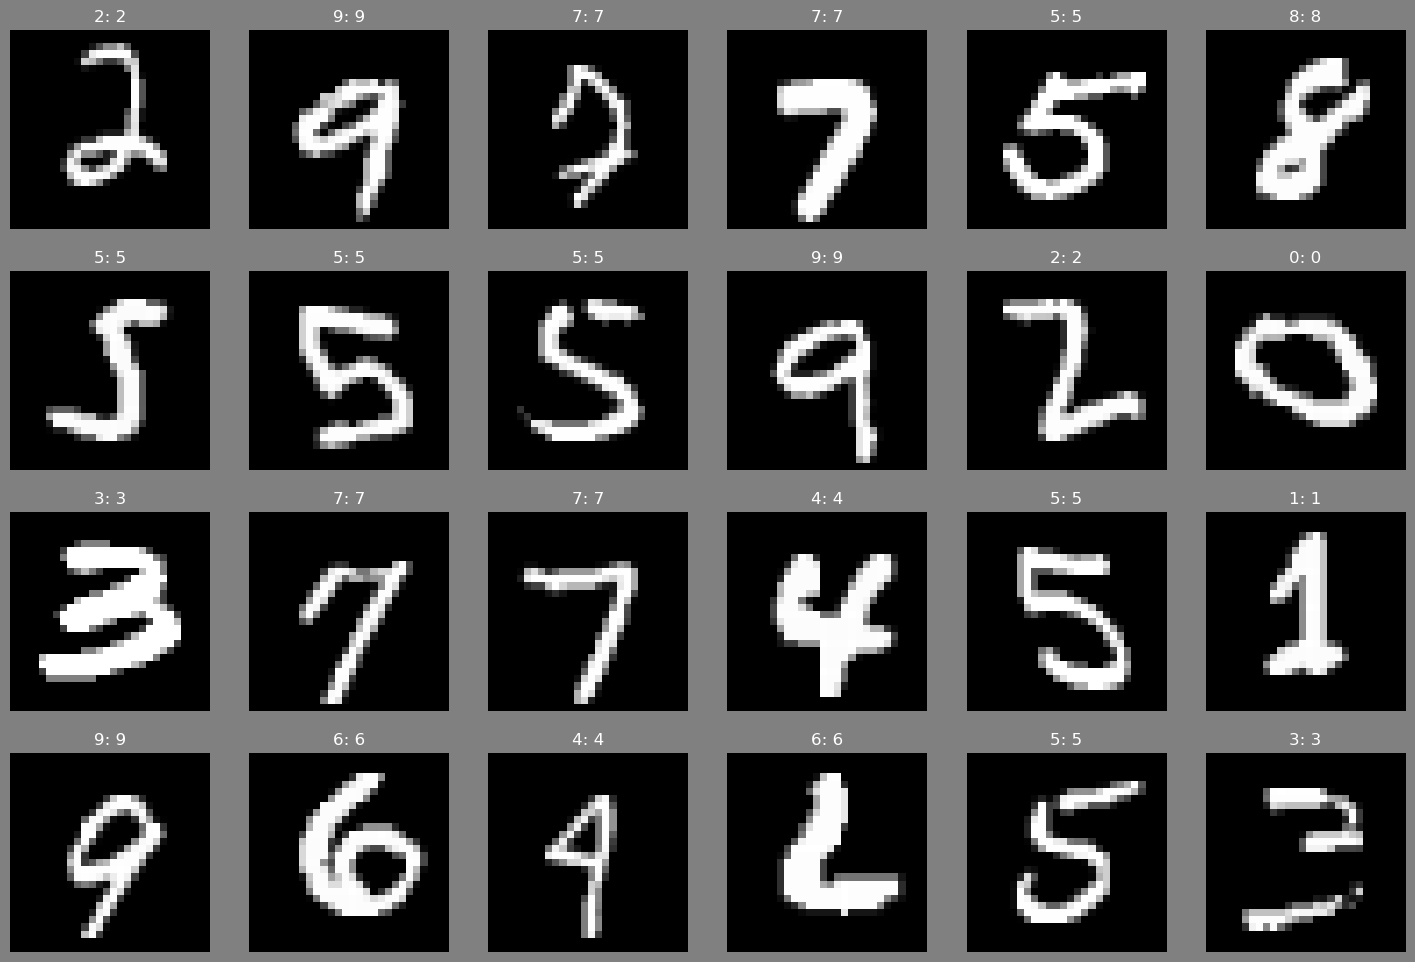

In [17]:
mlp.show_images_from_nparray_or_tensor(x=X_train, y=y_train, class_names=class_names, shape=(4, 6))

In [8]:
train_gen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)
train_gen.fit(X_train)

train_data = train_gen.flow(X_train, y_train, batch_size=32, shuffle=True, seed=42)

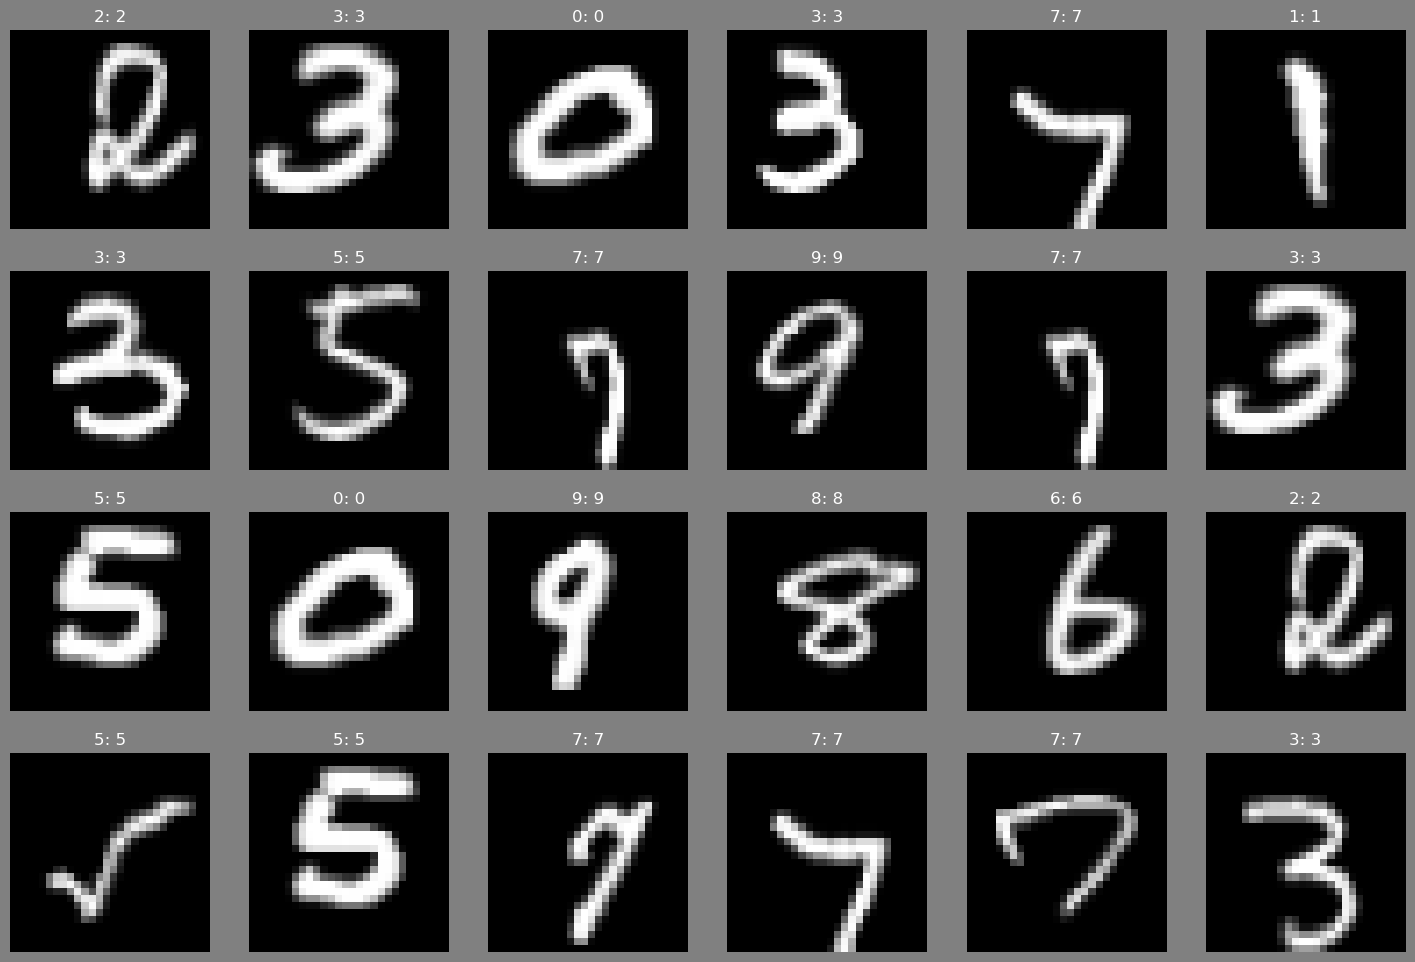

In [9]:
images, labels = train_data.next()
mlp.show_images_from_nparray_or_tensor(x=images, y=labels, class_names=class_names)

In [20]:
tf.random.set_seed(42)

model_1 = Sequential([
    Conv2D(filters=16, kernel_size=(2, 2), padding="same", activation="relu", input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=2),
    Dropout(rate=0.2),
    Conv2D(filters=16, kernel_size=2, strides=2, padding="same", activation="relu"),
    MaxPool2D(pool_size=2),
    Dropout(0.2),
    Conv2D(filters=16, kernel_size=2, strides=2, padding="same", activation="relu"),
    MaxPool2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model_1.compile(loss=categorical_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

model_1.summary()

Metal device set to: Apple M1 Max
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 16)          1040      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)  

In [21]:
history_1 = model_1.fit(
    train_data,
    epochs=25,
    batch_size=32,
    steps_per_epoch=len(train_data),
    validation_data=(X_test, y_test),
    validation_steps=len(X_test)
)

Epoch 1/25


2023-05-15 21:38:06.424885: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 27s 13ms/step - loss: 1.5311 - accuracy: 0.4564 - val_loss: 0.7815 - val_accuracy: 0.7487
Epoch 2/25
1875/1875 [==============================] - 23s 12ms/step - loss: 1.0769 - accuracy: 0.6296
Epoch 3/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.9178 - accuracy: 0.6907
Epoch 4/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.8113 - accuracy: 0.7260
Epoch 5/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.7517 - accuracy: 0.7486
Epoch 6/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.7052 - accuracy: 0.7635
Epoch 7/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6833 - accuracy: 0.7723
Epoch 8/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6523 - accuracy: 0.7818
Epoch 9/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6355 - accuracy: 0.7863
Epoch 10/25
 841/1875 [==========

## Try to find the optimal model using Keras Tuner

In [ ]:
# Create a model builder method which will be used by the Keras Tuner to create new models with new parameters.

def model_builder(hp):
    hp_conv_1_filters = hp.Choice('conv_1_filters', values=[24, 32, 48])
    hp_conv_2_filters = hp.Choice('conv_2_filters', values=[24, 32, 48])
    hp_conv_3_filters = hp.Choice('conv_3_filters', values=[24, 32, 48])

    hp_dropout_1_rate = hp.Choice('dropout_1_rate', values=[0.2])
    hp_dropout_2_rate = hp.Choice('dropout_2_rate', values=[0.2])
    hp_dropout_3_rate = hp.Choice('dropout_3_rate', values=[0.2])

    hp_dense_1_units = hp.Choice('dense_1_units', values=[64])

    model = Sequential([
        Conv2D(name="conv_1", filters=hp_conv_1_filters, kernel_size=(2, 2), padding="same", activation="relu",
               input_shape=(28, 28, 1)),
        MaxPool2D(pool_size=2),
        Dropout(name="dropout_1", rate=hp_dropout_1_rate),
        Conv2D(name="conv_2", filters=hp_conv_2_filters, kernel_size=2, strides=2, padding="same", activation="relu"),
        MaxPool2D(pool_size=2),
        Dropout(name="dropout_2", rate=hp_dropout_2_rate),
        Conv2D(name="conv_3", filters=hp_conv_3_filters, kernel_size=2, strides=2, padding="same", activation="relu"),
        MaxPool2D(pool_size=2),
        Dropout(name="dropout_3", rate=hp_dropout_3_rate),
        Flatten(),
        Dense(name="dense_1", units=hp_dense_1_units, activation="relu"),
        Dense(10, activation="softmax")
    ])

    hp_learning_rate = hp.Choice('learning_rate', values=[0.001])

    model.compile(loss=categorical_crossentropy,
                  optimizer=Adam(learning_rate=hp_learning_rate),
                  metrics=["accuracy"])

    return model

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner = kt.Hyperband(model_builder,
                     objective='accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='tuner',
                     project_name='keras-mnist')

tuner.search(
    train_data,
    epochs=25,
    steps_per_epoch=len(train_data),
    validation_data=(X_test, y_test),
    validation_steps=len(X_test),
    callbacks=[stop_early]
)

## Get the best model from the results and print out a summary.

In [ ]:
best_models = tuner.get_best_models(num_models=2)
best_models[0].summary()

## Get the best hyper parameters and print them out.

In [69]:
best_parameters = tuner.get_best_hyperparameters(1)[0]
best_parameters.values

{'conv_1_filters': 48,
 'conv_2_filters': 48,
 'conv_3_filters': 48,
 'dropout_1_rate': 0.2,
 'dropout_2_rate': 0.2,
 'dropout_3_rate': 0.2,
 'dense_1_units': 64,
 'learning_rate': 0.001,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0012'}

## Build a new model using these hyperparameters

In [10]:
tf.random.set_seed(42)

model_2 = Sequential([
    Conv2D(filters=48, kernel_size=(2, 2), padding="same", activation="relu", input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=2),
    Dropout(rate=0.2),
    Conv2D(filters=48, kernel_size=2, strides=2, padding="same", activation="relu"),
    MaxPool2D(pool_size=2),
    Dropout(0.2),
    Conv2D(filters=48, kernel_size=2, strides=2, padding="same", activation="relu"),
    MaxPool2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model_2.compile(loss=categorical_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

model_2.summary()

Metal device set to: Apple M1 Max
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 48)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 48)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 48)          9264      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 48)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)  

In [11]:
history_2 = model_2.fit(
    train_data,
    epochs=50,
    batch_size=32,
    steps_per_epoch=len(train_data),
    validation_data=(X_test, y_test),
    validation_steps=len(X_test)
)

Epoch 1/50


2023-05-15 21:48:39.578818: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 28s 15ms/step - loss: 0.8874 - accuracy: 0.6984 - val_loss: 0.2992 - val_accuracy: 0.9068
Epoch 2/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4096 - accuracy: 0.8685
Epoch 3/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3344 - accuracy: 0.8943
Epoch 4/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2829 - accuracy: 0.9093
Epoch 5/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2576 - accuracy: 0.9185
Epoch 6/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2392 - accuracy: 0.9237
Epoch 7/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2275 - accuracy: 0.9282
Epoch 8/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2166 - accuracy: 0.9316
Epoch 9/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2055 - accuracy: 0.9340
Epoch 10/50
1875/1875 [==========

## Evaluate model_2 to see the accuracy of the found model

In [12]:
results = model_2.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 3s 9ms/step - loss: 0.0549 - accuracy: 0.9814
test loss, test acc: [0.05486451834440231, 0.9814000725746155]


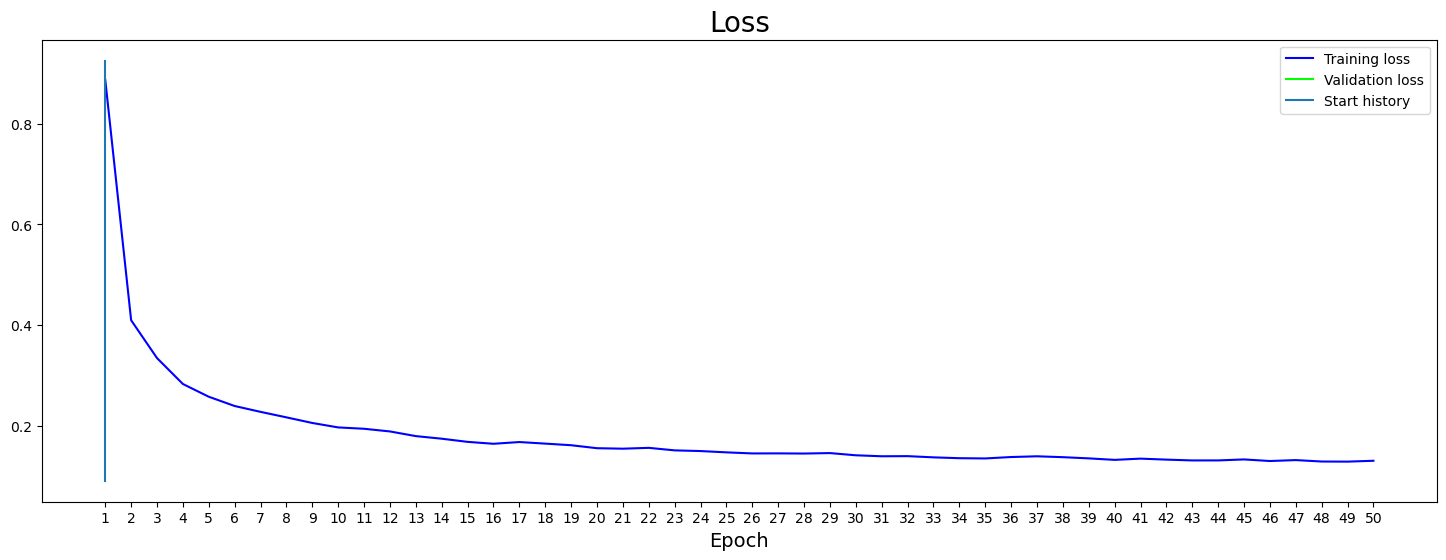

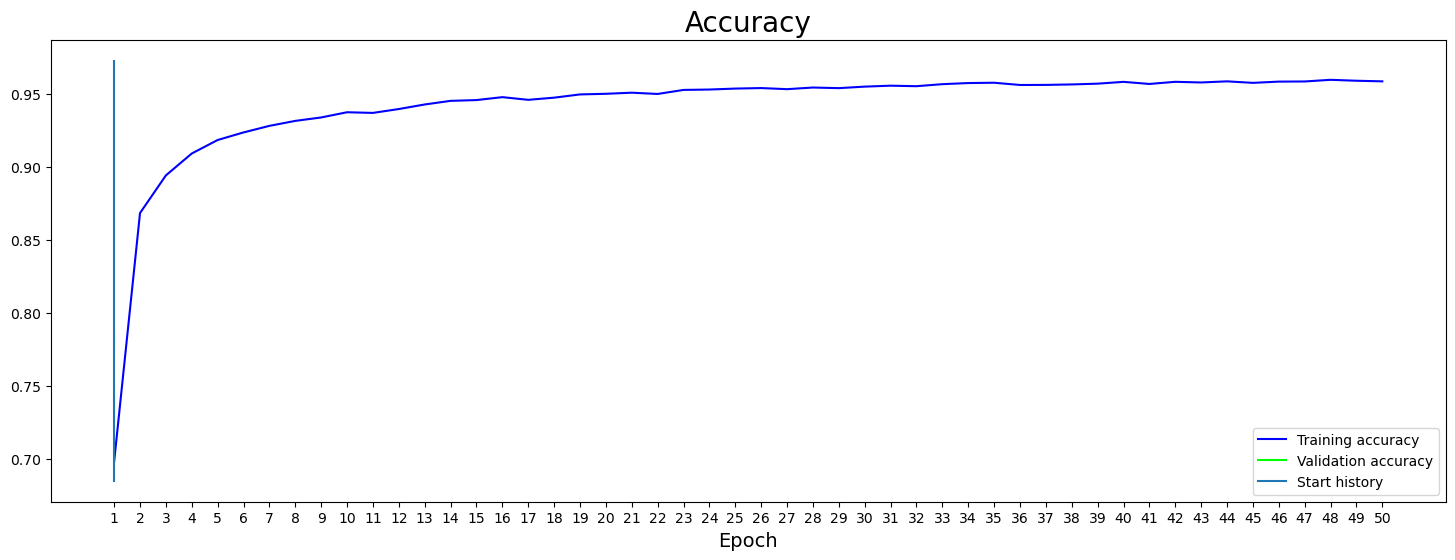

In [13]:
mlp.plot_history(history=history_2, figsize=(18, 6))

313/313 [==============================] - 1s 3ms/step


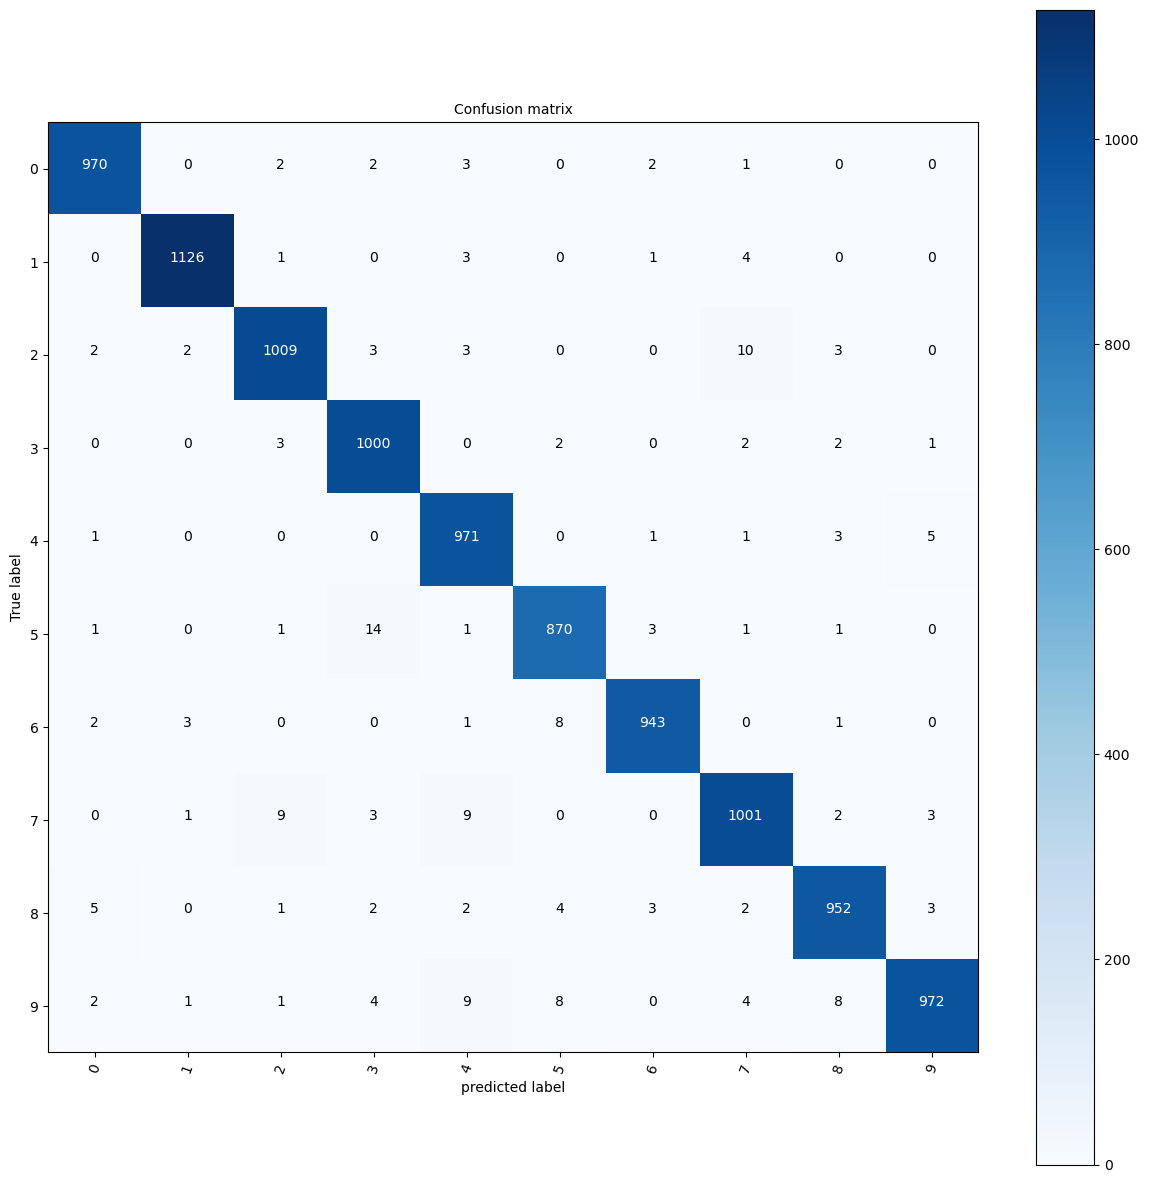

In [14]:
y_pred = model_2.predict(X_test)
mlp.plot_classification_confusion_matrix(y_true=y_test, y_pred=y_pred)

## Add BatchNormalization and check the results

In [24]:
tf.random.set_seed(42)

model_3 = Sequential([
    Conv2D(filters=48, kernel_size=(2, 2), padding="same", input_shape=(28, 28, 1)),
    BatchNormalization(),
    Activation("relu"),
    MaxPool2D(pool_size=2),
    Dropout(rate=0.2),
    Conv2D(filters=48, kernel_size=2, strides=2, padding="same"),
    BatchNormalization(),
    Activation("relu"),
    MaxPool2D(pool_size=2),
    Dropout(0.2),
    Conv2D(filters=48, kernel_size=2, strides=2, padding="same"),
    BatchNormalization(),
    Activation("relu"),
    MaxPool2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model_3.compile(loss=categorical_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 48)        240       
                                                                 
 batch_normalization_18 (Bat  (None, 28, 28, 48)       192       
 chNormalization)                                                
                                                                 
 activation_15 (Activation)  (None, 28, 28, 48)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 48)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 14, 14, 48)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 7, 48)         

In [25]:
model_3.summary()
history_3 = model_3.fit(
    train_data,
    epochs=50,
    batch_size=32,
    steps_per_epoch=len(train_data),
    validation_data=(X_test, y_test),
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 48)        240       
                                                                 
 batch_normalization_18 (Bat  (None, 28, 28, 48)       192       
 chNormalization)                                                
                                                                 
 activation_15 (Activation)  (None, 28, 28, 48)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 48)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 14, 14, 48)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 7, 48)         

### Evaluate model 3

In [26]:
results = model_3.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 3s 8ms/step - loss: 0.0724 - accuracy: 0.9755
test loss, test acc: [0.07238630950450897, 0.9755000472068787]


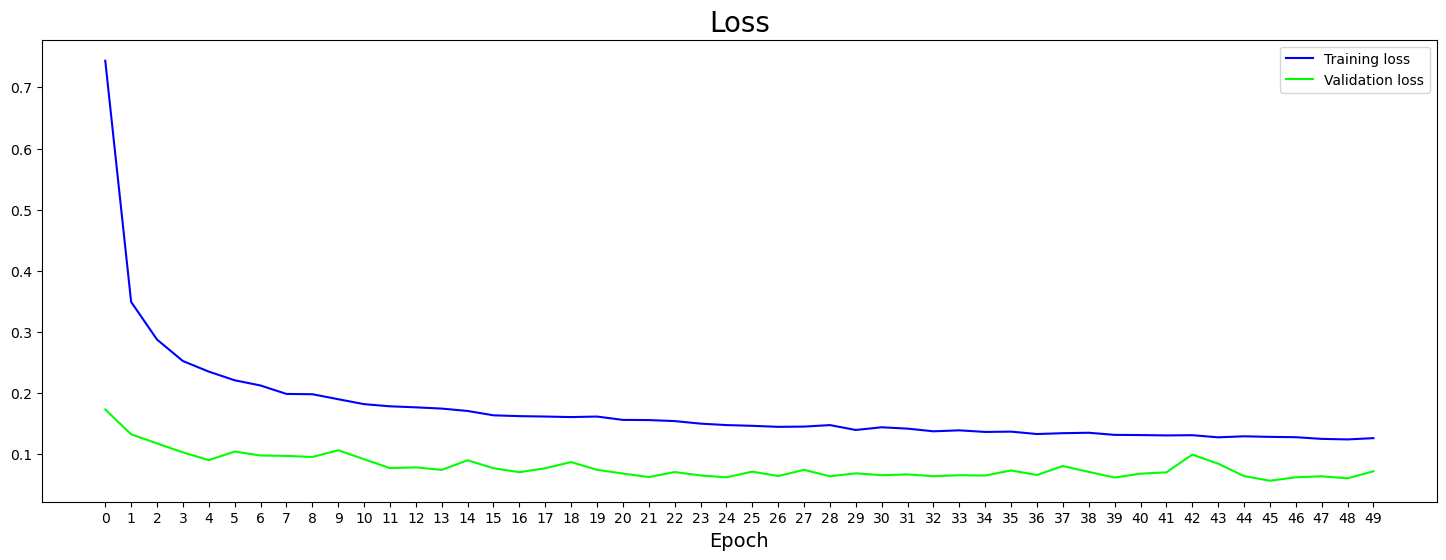

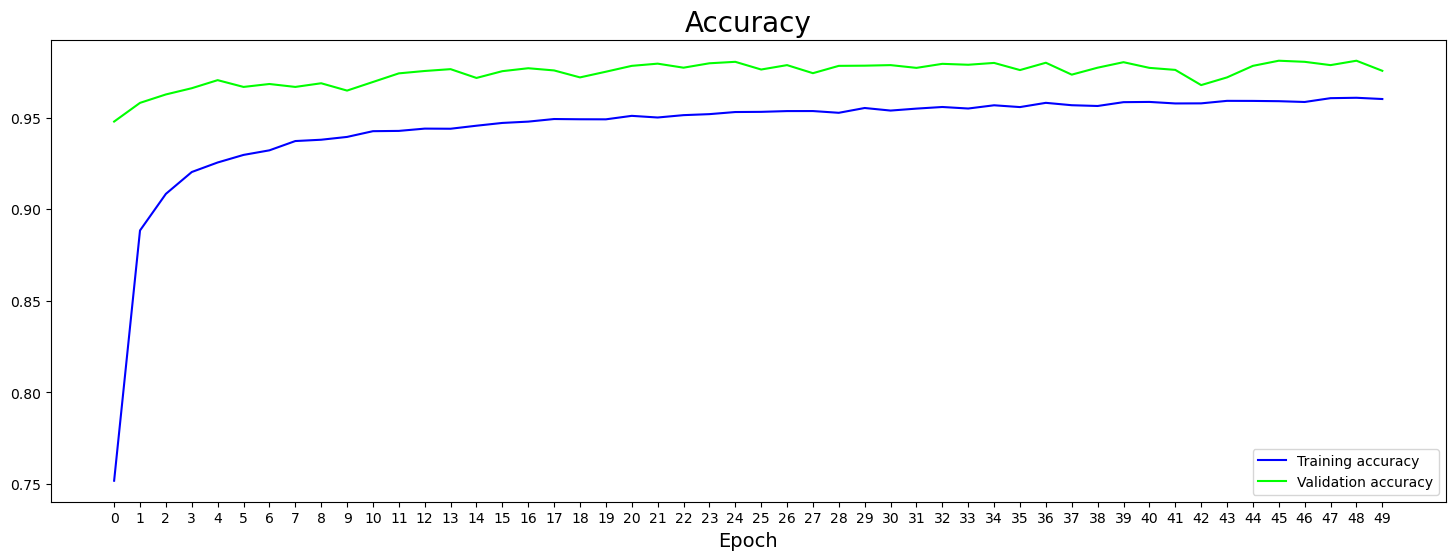

In [27]:
mlp.plot_history(history=history_3, figsize=(18, 6))